In [168]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

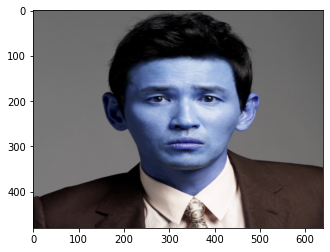

In [169]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img.png'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 480))    
img_show = img_bgr.copy()      # 출력용
plt.imshow(img_bgr)
plt.show()

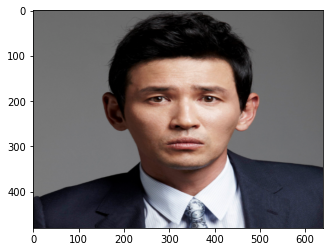

In [170]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [171]:
import dlib
detector_hog = dlib.get_frontal_face_detector()

In [172]:
# bounding box
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(216, 142) (439, 365)]]


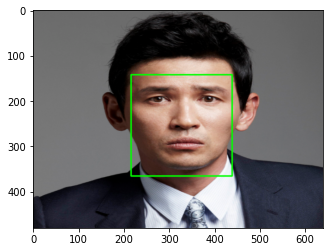

In [173]:
# 찾은 얼굴을 화면에 출력

print(dlib_rects)    # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [174]:
# 저장한 landmark 모델 불러오기
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [175]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


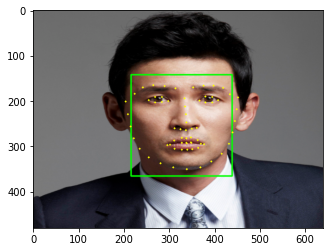

In [176]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [177]:
# 좌표
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] # - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
# 코의 중심점이 (338,247)

(338, 247)
(x,y) : (338,247)
(w,h) : (224,224)


In [178]:
# 준비해 둔 스티커 이미지를 읽어서 적용해 보겠습니다.
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

(224, 224, 3)


In [179]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.

refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (226,135)


In [180]:
# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

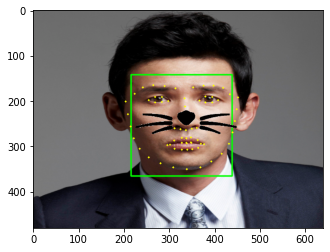

In [181]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [182]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(338, 247)
(x,y) : (338,135)
(w,h) : (224,224)


In [183]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

(224, 224, 3)


In [184]:
refined_x = x - w // 2  # left
refined_y = y - h   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (226,-89)


In [185]:
# y축 좌표의 값이 음수일 경우 crop

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0

In [186]:
# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

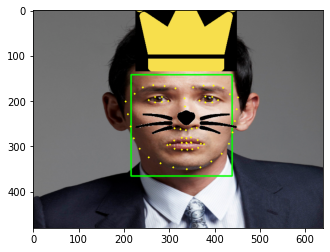

In [187]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 다른 각도에서의 사진

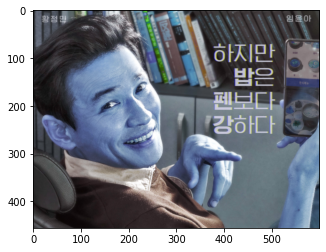

In [235]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_side.png'
img_bgr = cv2.imread(my_image_path)    
#img_bgr = cv2.resize(img_bgr, (720, 480))    
img_show = img_bgr.copy()      # 출력용
plt.imshow(img_bgr)
plt.show()

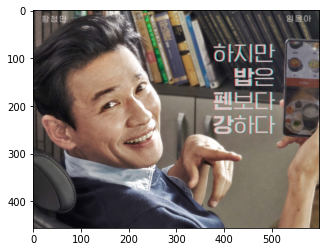

In [236]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [237]:
import dlib
detector_hog = dlib.get_frontal_face_detector()

In [238]:
# bounding box
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(118, 139) (304, 325)]]


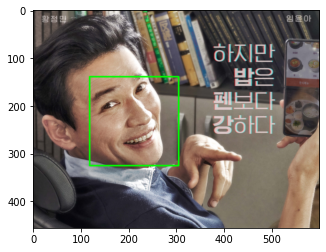

In [239]:
# 찾은 얼굴을 화면에 출력

print(dlib_rects)    # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [240]:
# 저장한 landmark 모델 불러오기
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [241]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


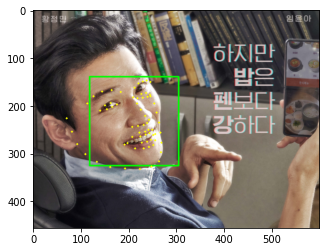

In [242]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [243]:
# 좌표
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] # - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
# 코의 중심점이 (35, 156)

(234, 221)
(x,y) : (234,221)
(w,h) : (187,187)


In [244]:
# 준비해 둔 스티커 이미지를 읽어서 적용해 보겠습니다.
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

(187, 187, 3)


In [245]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.

refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (141,128)


In [246]:
# y좌표가 음수일 때, -y만큼 이미지를 잘라준 후 y 경계값은 0으로 설정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(187, 187, 3)
(x,y) : (141,128)


In [247]:
# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

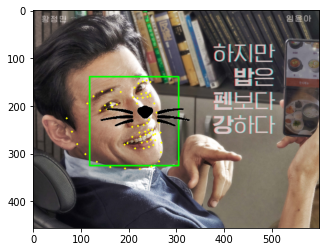

In [248]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [249]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(234, 221)
(x,y) : (234,128)
(w,h) : (187,187)


In [250]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

(187, 187, 3)


In [251]:
refined_x = x - w // 2  # left
refined_y = y - h   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (141,-59)


In [252]:
# y축 좌표의 값이 음수일 경우 crop

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0

In [253]:
# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

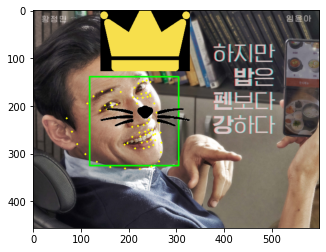

In [254]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# Conclusion

처음부터 문제가 많았습니다. 제 핸드폰으로 사진을 찍고 노트북으로 전송후 사진을 불러오기를 하려고 하니 랜드마크가 안찍히더라구요. 한 10번을 시도한 결과 모두 다 실패해서 그냥 제가 좋아하는 황정민 배우님의 사진으로 했습니다. 또한 jpeg 파일 확장자도 랜드마크가 안찍히더라구요. 저만의 문제인거 같습니다만, 이로 인해 모든 사진 파일 형식은 PNG로 통일을 하게 되었습니다. 그래서 사진을 구하는게 너무 힘들었습니다;; 정면으로 찍힌 사진은 잘 인식이 되고 스티커도 잘 적용이 되었습니다. 다만, 측면으로 찍힌 사진은 스티커가 제대로 찍히기는 하지만 정확한 위치에는 찍히지 않았습니다. 수염은 원래 위치에 살짝 위에 위치해 있고 왕관은 머리 위에 위치해 하지 않고 있습니다. 또한 투명도를 조절하는 부분을 해결하지 못했습니다ㅜㅜ 전체적으로 느낀점은, 이미지 관련 모델은 이미지 데이터의 퀄리티가 중요하다고 배웠습니다. 물론 이미지 전처리 관련 기술도 있을테니 먼 훗날에는 그런 문제는 줄어들겠죠...? 일단 저는 이번 노드도 정말 힘들게 했으니, 노드가 어떻게 진행이 되었는지 한번더 공부하고 연구하는게 먼저일거 같습니다. 항상 느끼는거지만, 저는 너무 부족한거 같고 더 열심히 해야겠다는 의지가 생깁니다!